In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')


import warnings
warnings.filterwarnings('ignore')

In [138]:
path = r"quikr_car.csv"

data = pd.read_csv(path)
df = data.copy()
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [139]:
df.shape

(892, 6)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [141]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## cleaning Data

In [142]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [143]:
df = df[df['year'].str.isnumeric()]   


In [144]:
df['year']=df['year'].astype(int)  # year is in object. Change to integer
df.shape

(842, 6)

In [145]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [146]:
df = df[df['Price']!='Ask For Price']

In [147]:
df['Price'] = df['Price'].str.replace(',','').astype(int)  # replace , with space
df.shape

(819, 6)

In [148]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [149]:
df['kms_driven'] = df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [150]:
df = df[df['kms_driven'].str.isnumeric()]

In [151]:
df['kms_driven'] = df['kms_driven'].astype(int)
df.shape

(817, 6)

#### we have data for used car and consider car driven in KMs more than 100

In [152]:
df[df['kms_driven']<=100].shape  # less than and equal to 100 kms driven care we can drop the data


(14, 6)

In [153]:
df = df[df['kms_driven']>100]
df.shape

(803, 6)

In [154]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [155]:
df = df[~df['fuel_type'].isna()]

In [156]:
df.shape

(802, 6)

### name and company had Text data...but with the previous cleaning, those rows got removed.
#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [157]:
df['company'].nunique()

25

In [158]:
df['company'].value_counts()

Maruti        218
Hyundai       138
Mahindra       92
Tata           63
Honda          60
Toyota         35
Chevrolet      34
Renault        33
Ford           29
Volkswagen     19
Skoda          13
Audi           11
BMW             8
Mini            8
Datsun          7
Mercedes        6
Nissan          6
Mitsubishi      6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Volvo           1
Jeep            1
Name: company, dtype: int64

In [159]:
df['name'] = df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [160]:
df = df.reset_index(drop=True)  # reset index of final clean Data
df.tail()

,name,company,year,Price,kms_driven,fuel_type
797,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
798,Tata Indica V2,Tata,2009,110000,30000,Diesel
799,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
800,Tata Zest XM,Tata,2018,260000,27000,Diesel
801,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel


### Cleaned Data

In [161]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
2,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
3,Ford Figo,Ford,2012,175000,41000,Diesel
4,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
...,...,...,...,...,...,...
797,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
798,Tata Indica V2,Tata,2009,110000,30000,Diesel
799,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
800,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [162]:
path1 = 'Cleaned_Car_data.csv'
df.to_csv(path1, index=False)

## Load Cleaned Data

In [163]:
path1 = r'Cleaned_Car_data.csv'
data1 = pd.read_csv(path1)
df = data1.copy()

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        802 non-null    object
 1   company     802 non-null    object
 2   year        802 non-null    int64 
 3   Price       802 non-null    int64 
 4   kms_driven  802 non-null    int64 
 5   fuel_type   802 non-null    object
dtypes: int64(3), object(3)
memory usage: 37.7+ KB


In [165]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,802,802,802.000000,8.020000e+02,802.000000,802
unique,252,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,49,218,NaN,NaN,NaN,422
mean,NaN,NaN,2012.394015,4.100936e+05,47082.788030,NaN
std,NaN,NaN,3.961975,4.780097e+05,34041.787607,NaN
min,NaN,NaN,1995.000000,3.000000e+04,122.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,28000.000000,NaN
50%,NaN,NaN,2013.000000,2.994995e+05,41900.000000,NaN
75%,NaN,NaN,2015.000000,4.899990e+05,57980.750000,NaN


### EDA

In [166]:
print(df['Price'].describe())


count    8.020000e+02
mean     4.100936e+05
std      4.780097e+05
min      3.000000e+04
25%      1.750000e+05
50%      2.994995e+05
75%      4.899990e+05
max      8.500003e+06
Name: Price, dtype: float64


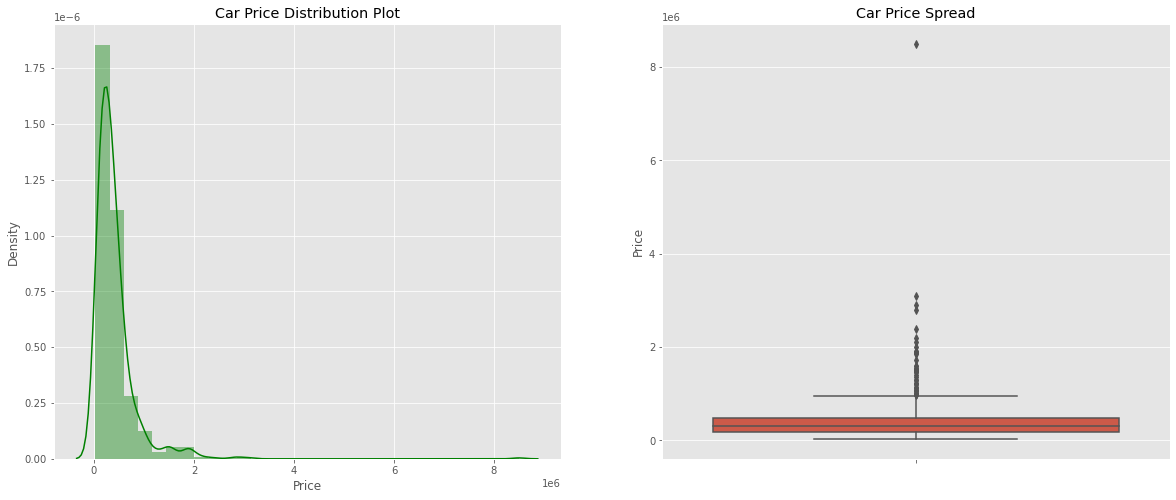

In [167]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['Price'],color='g', bins=30)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y = df['Price'])

plt.show()

### Inference :
- The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 200,000).
- There is a significant difference between the mean and the median of the price distribution.

In [168]:
df['Price'].quantile(0.85)

600000.0

In [169]:
df = df[df['Price']<6000000]

In [170]:
print(df['Price'].describe())

count    8.010000e+02
mean     3.999938e+05
std      3.832343e+05
min      3.000000e+04
25%      1.750000e+05
50%      2.990000e+05
75%      4.899990e+05
max      3.100000e+06
Name: Price, dtype: float64


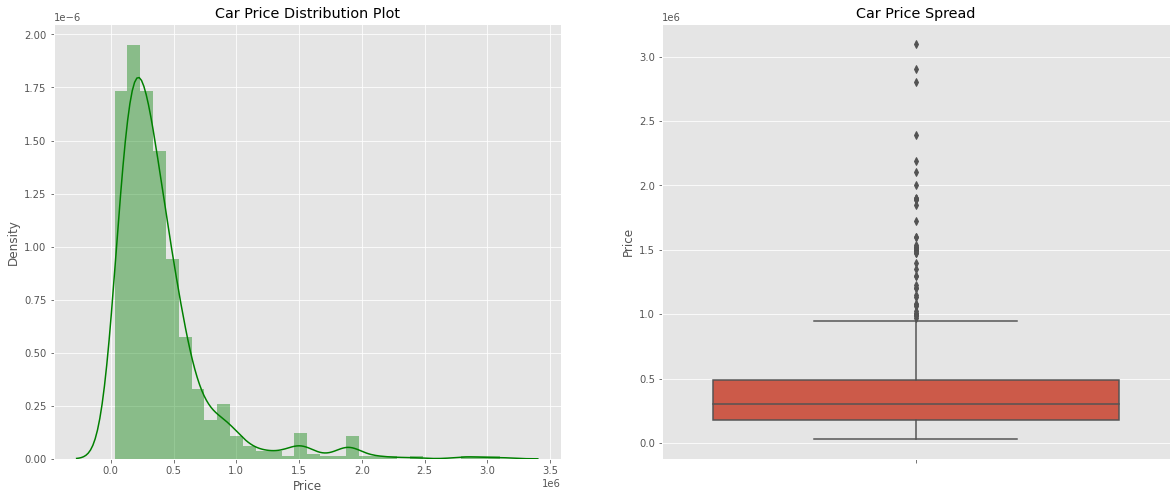

In [171]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['Price'],color='g', bins=30)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y = df['Price'])

plt.show()

In [172]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
2,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
3,Ford Figo,Ford,2012,175000,41000,Diesel
4,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
...,...,...,...,...,...,...
797,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
798,Tata Indica V2,Tata,2009,110000,30000,Diesel
799,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
800,Tata Zest XM,Tata,2018,260000,27000,Diesel


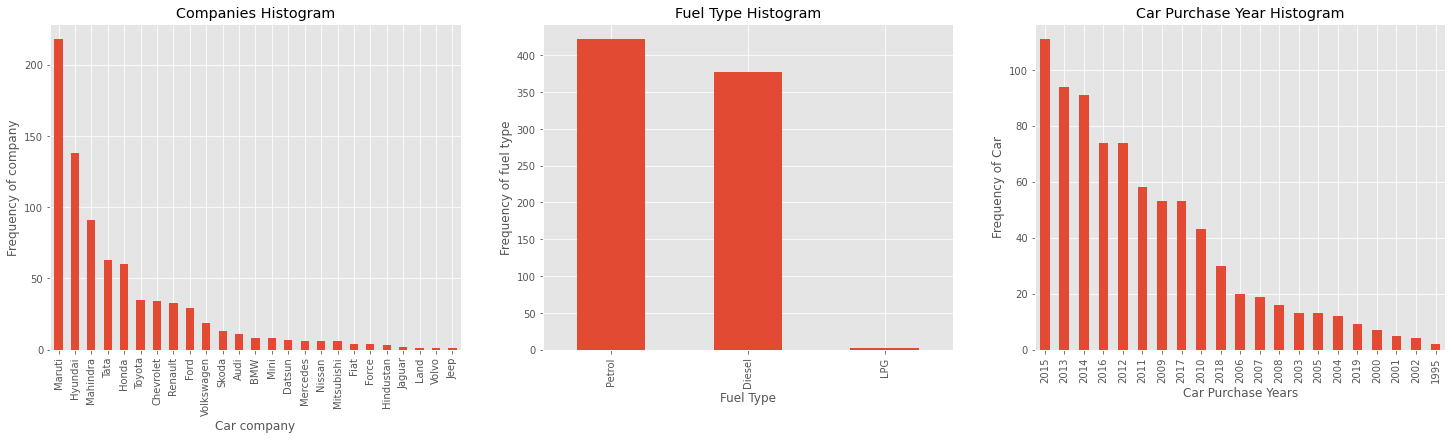

In [173]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['company'].value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')
 
plt.subplot(1,3,2)
plt1 = df['fuel_type'].value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df['year'].value_counts().plot(kind = 'bar')
plt.title('Car Purchase Year Histogram')
plt1.set(xlabel = 'Car Purchase Years', ylabel='Frequency of Car')

plt.show()

In [174]:
car_company = df['company'].unique().tolist()
car_company

['Hyundai',
 'Ford',
 'Maruti',
 'Skoda',
 'Mahindra',
 'Audi',
 'Toyota',
 'Renault',
 'Honda',
 'Datsun',
 'Mitsubishi',
 'Tata',
 'Volkswagen',
 'Chevrolet',
 'Mini',
 'BMW',
 'Nissan',
 'Hindustan',
 'Fiat',
 'Force',
 'Mercedes',
 'Land',
 'Jaguar',
 'Jeep',
 'Volvo']

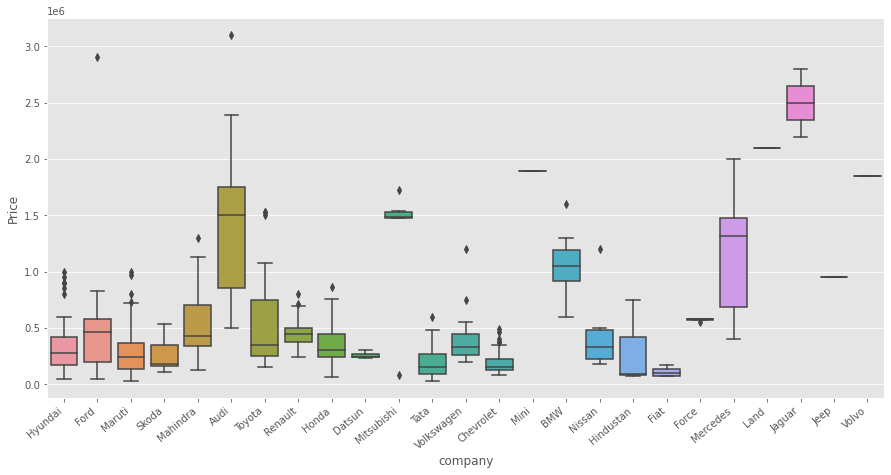

In [175]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [176]:
df[df['kms_driven']<5000].shape

(33, 6)

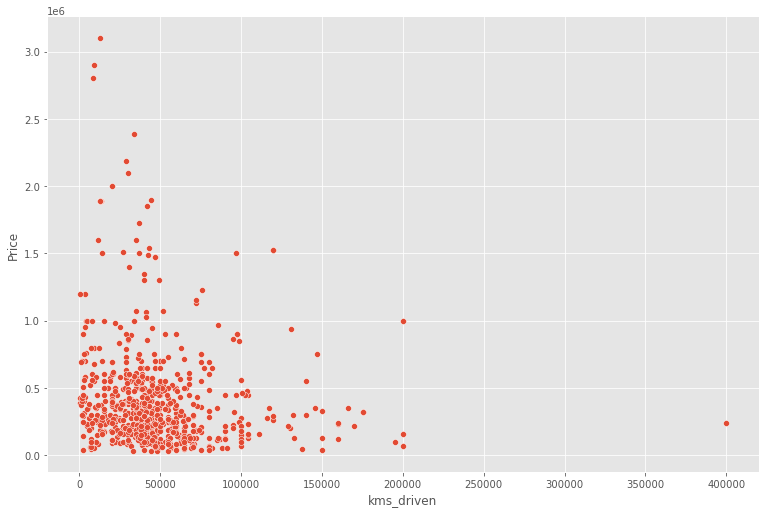

In [177]:
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

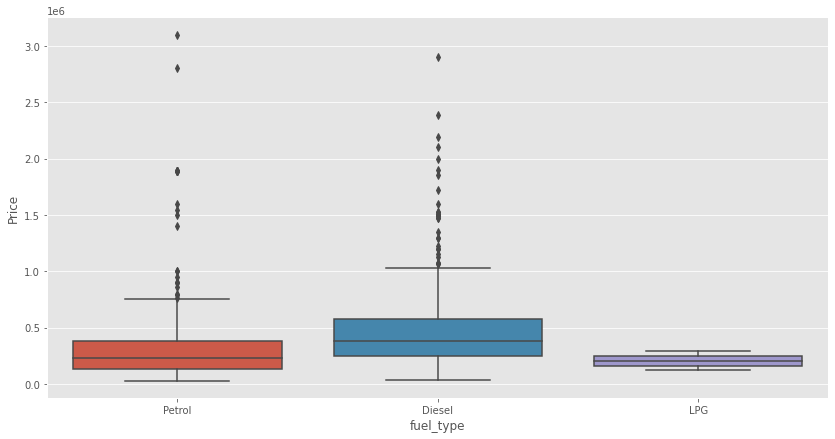

In [178]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=df)

### split Data

In [179]:
X = df.drop('Price', 1)
y = df['Price']

In [180]:
X.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Hyundai Grand i10,Hyundai,2014,28000,Petrol
2,Ford EcoSport Titanium,Ford,2014,36000,Diesel
3,Ford Figo,Ford,2012,41000,Diesel
4,Hyundai Eon,Hyundai,2013,25000,Petrol


### Train Test Split

In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [183]:
# Creating an OneHotEncoder object to contain all the possible categories

ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [184]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [185]:
#Creating a column transformer to transform categorical columns 
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [186]:
# Linear Regression Model
lr=LinearRegression()

In [187]:
# Make Pipeline
pipe=make_pipeline(column_trans, lr)

In [188]:

pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [189]:
y_pred=pipe.predict(X_test)

In [190]:
r2_score(y_test,y_pred)

0.7524243693386444

In [191]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [192]:
np.argmax(scores)

596

In [193]:
scores[np.argmax(scores)]

0.9586227847444513

In [194]:
X_train.columns

Index(['name', 'company', 'year', 'kms_driven', 'fuel_type'], dtype='object')

In [195]:
np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)

array([['Maruti Suzuki Swift', 'Maruti', '2019', '100', 'Petrol']],
      dtype='<U19')

In [196]:
pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5))

,name,company,year,kms_driven,fuel_type
0,Maruti Suzuki Swift,Maruti,2019,100,Petrol


In [197]:
t = pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5))

In [198]:
pipe.predict(t)

array([426996.96310707])

In [199]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9586227847444513

In [200]:
import pickle

In [201]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [202]:
t1 = pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5))
pipe.predict(t1)

array([425627.3807354])

In [205]:
t1 = pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],
                  data=np.array(['Hyundai Grand i10','Hyundai',2014,28000,'Petrol']).reshape(1,5))
pipe.predict(t1)

array([343922.61949491])

In [206]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [207]:
sorted(df['year'].unique(),reverse=True)

[2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000,
 1995]